In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd

# Read the uploaded CSV
df = pd.read_csv("data.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display all transactions
print("📋 All Transactions:\n")
print(df.to_string(index=False))

📋 All Transactions:

      Date      Category          Description  Amount    Type
2025-06-01          Food                Lunch     150 Expense
2025-06-01        Salary          June salary   30000  Income
2025-06-02     Transport         Metro ticket      40 Expense
2025-06-03 Entertainment          Movie night     250 Expense
2025-06-05         Bills     Electricity bill    1200 Expense
2025-06-06          Food               Dinner     180 Expense
2025-06-07     Freelance         Project work    5000  Income
2025-06-08      Shopping              Clothes    1200 Expense
2025-06-09        Travel        Train to home     600 Expense
2025-06-10          Gift    Friend’s birthday     300 Expense
2025-06-11        Salary      Mid-month bonus    2000  Income
2025-06-12         Bills        Internet bill     800 Expense
2025-06-13      Shopping                Shoes    1500 Expense
2025-06-14 Entertainment              Concert     500 Expense
2025-06-15          Food               Snacks    

In [3]:
# Calculate total income, total expenses, and net balance
total_income = df[df['Type'] == 'Income']['Amount'].sum()
total_expense = df[df['Type'] == 'Expense']['Amount'].sum()
balance = total_income - total_expense

# Display the summary
print("\n💰 Finance Summary:")
print(f"Total Income   : ₹{total_income:,.2f}")
print(f"Total Expenses : ₹{total_expense:,.2f}")
print(f"Net Balance    : ₹{balance:,.2f}")


💰 Finance Summary:
Total Income   : ₹46,500.00
Total Expenses : ₹13,417.00
Net Balance    : ₹33,083.00


/tmp/ipython-input-4-2160446338.py:14: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


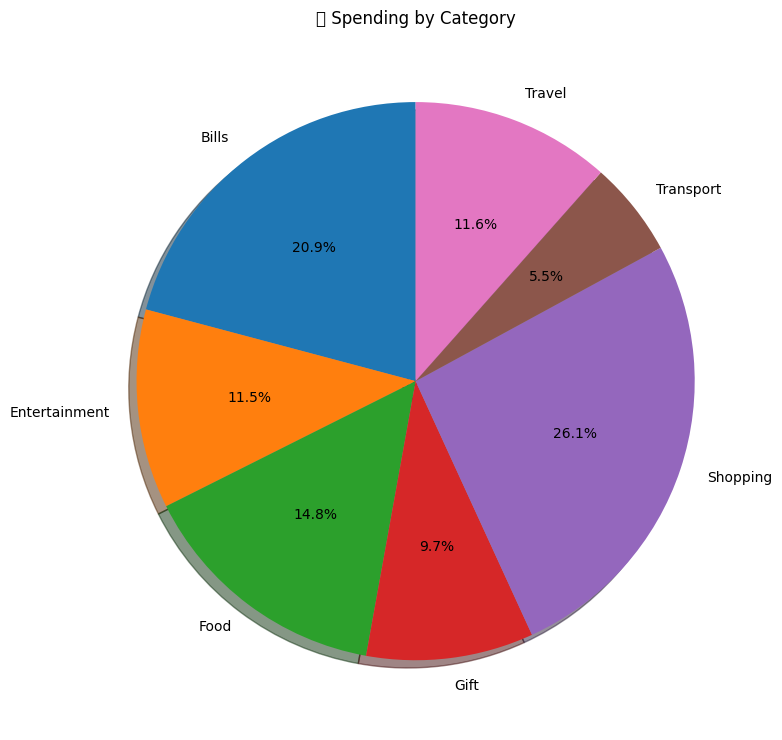

In [4]:
import matplotlib.pyplot as plt

# Filter only Expense records
expense_df = df[df['Type'] == 'Expense']

# Group and sum by category
category_totals = expense_df.groupby("Category")["Amount"].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
category_totals.plot(kind="pie", autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("💸 Spending by Category")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()

In [6]:
print("➕ Add a New Transaction")

# Step 1: Collect input from user
date = input("Enter date (YYYY-MM-DD): ")
category = input("Enter category (e.g., Food, Salary, Bills): ")
description = input("Enter description: ")
amount = float(input("Enter amount: "))
txn_type = input("Enter type (Income/Expense): ")

➕ Add a New Transaction
Enter date (YYYY-MM-DD): 2025-07-01
Enter category (e.g., Food, Salary, Bills): Food
Enter description: BreakFast
Enter amount: 120
Enter type (Income/Expense): Expense


In [7]:
# Step 2: Create a new DataFrame row from the input
new_entry = pd.DataFrame({
    "Date": [date],
    "Category": [category],
    "Description": [description],
    "Amount": [amount],
    "Type": [txn_type]
})

# Convert Date column to datetime
new_entry['Date'] = pd.to_datetime(new_entry['Date'])

# Show the new row to confirm
print("\n📌 New Transaction Row:")
print(new_entry)


📌 New Transaction Row:
        Date Category Description  Amount     Type
0 2025-07-01     Food   BreakFast   120.0  Expense


In [8]:
# Step 3: Append the new entry to the existing DataFrame
df = pd.concat([df, new_entry], ignore_index=True)

# Show confirmation
print("\n✅ New transaction added to the dataset!")
print("\n📋 Last 5 Transactions:\n")
print(df.tail(5))


✅ New transaction added to the dataset!

📋 Last 5 Transactions:

         Date       Category         Description  Amount     Type
26 2025-06-27           Food           Groceries  1100.0  Expense
27 2025-06-28          Bills          Water bill   500.0  Expense
28 2025-06-29  Entertainment   Game subscription   299.0  Expense
29 2025-06-30         Salary  Side hustle payout  2500.0   Income
30 2025-07-01           Food           BreakFast   120.0  Expense


In [9]:
# Step 4: Save the updated DataFrame to CSV
df.to_csv("data.csv", index=False)

print("💾 Updated data saved to 'data.csv' successfully!")

💾 Updated data saved to 'data.csv' successfully!


In [10]:
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
print("🔍 Step-by-Step Preview and Date Filter")

# STEP 1: Show categories and let user choose one to preview
print("\n📂 Available Categories:")
print(df['Category'].unique())

selected_category = input("\nEnter a category to preview: ")

# Show only the selected category (preview)
category_filtered = df[df['Category'].str.lower() == selected_category.lower()]

if category_filtered.empty:
    print(f"\n❌ No transactions found for category: {selected_category}")
else:
    print(f"\n✅ Preview of transactions in category: {selected_category}")
    print(category_filtered.to_string(index=False))

# STEP 2: Now get date range and filter all categories within dates
print("\n📅 Now filter all transactions by date range (for all categories):")
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

try:
    # Convert to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filter for all categories in date range
    date_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    if date_filtered.empty:
        print(f"\n❌ No transactions found between {start_date.date()} and {end_date.date()}.")
    else:
        print(f"\n✅ All transactions between {start_date.date()} and {end_date.date()}:")
        print(date_filtered.to_string(index=False))

except:
    print("⚠️ Invalid date format. Please use YYYY-MM-DD.")

🔍 Step-by-Step Preview and Date Filter

📂 Available Categories:
['Food' 'Salary' 'Transport' 'Entertainment' 'Bills' 'Freelance'
 'Shopping' 'Travel' 'Gift']

Enter a category to preview: Food

✅ Preview of transactions in category: Food
      Date Category Description  Amount    Type
2025-06-01     Food       Lunch   150.0 Expense
2025-06-06     Food      Dinner   180.0 Expense
2025-06-15     Food      Snacks   100.0 Expense
2025-06-19     Food       Lunch   200.0 Expense
2025-06-23     Food      Dinner   250.0 Expense
2025-06-27     Food   Groceries  1100.0 Expense
2025-07-01     Food   BreakFast   120.0 Expense

📅 Now filter all transactions by date range (for all categories):
Enter start date (YYYY-MM-DD): 2025-06-01
Enter end date (YYYY-MM-DD): 2025-06-15

✅ All transactions between 2025-06-01 and 2025-06-15:
      Date      Category       Description  Amount    Type
2025-06-01          Food             Lunch   150.0 Expense
2025-06-01        Salary       June salary 30000.0  Inco

In [25]:
from google.colab import files
uploaded = files.upload()

Saving spendwise_500.csv to spendwise_500.csv


In [26]:
import pandas as pd

# Replace the filename with your actual file name
df = pd.read_csv("spendwise_500.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Preview the data
df.head()

,Date,Category,Description,Amount,Type
0,2025-05-10,Education,Tuition fee,3248.23,Expense
1,2025-01-25,Healthcare,Checkup,2478.65,Expense
2,2025-03-07,Travel,Vacation trip,3686.20,Expense
3,2025-02-03,Entertainment,Concert,2034.06,Expense
4,2025-03-07,Bills,Mobile recharge,1436.23,Expense
